# Data Preprocessing and Visualization

## Data Preprocessing

In previous instructions we have already seen several data preprocessing methods. Recall, for example, the instructions on data exploration, basic visualization, decison trees or regression. We learned about preprocessing steps such as

* One-hot encoding
* Outlier detection
* Handling missing values
* etc.

Today we will show you a few more advanced techniques. However, note that there are many possiblities to achieve your preprocessing goals in python and this instruction just shows an excerpt of all possibilites.

We will mostly use the *sklearn.preprocessing* package as well as *pandas* and *numpy*.

### Missing Values

To illustrate the handling of missing values we will use a running example based on the diabetes data set. The data set has the following attributes:

* 0: Number of times pregnant
* 1: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* 2: Diastolic blood pressure (mm Hg).
* 3: Triceps skinfold thickness (mm).
* 4: 2-Hour serum insulin (mu U/ml).
* 5: Body mass index (weight in kg/(height in m)^2).
* 6: Diabetes pedigree function.
* 7: Age (years).
* 8: Class variable (0 or 1).

Let's first import the data set and use the *describe()* method to print a statistic summary on the data set.

In [1]:
from pandas import read_csv
dataset = read_csv('pima-indians-diabetes.csv', header=None)
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

This summary can already help us identify missing values. Recall from the lecture that not always missing values will be denoted as NAN. From the summary we see that several attributes have a minimum value of 0. From this, combined with domain knowledge, we can conclude that for several attributes the value 0 represents a missing value.
These attributes are:

* 1: Plasma glucose concentration
* 2: Diastolic blood pressure
* 3: Triceps skinfold thickness
* 4: 2-Hour serum insulin
* 5: Body mass index

We are interested in how many of these missing values we have per attribute.

In [2]:
print((dataset[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


The different amounts of missing values per feature illustrate the need for different strategies to handle missing data. 

First of all, we are going to transform our data, such that the invalid 0 values are actually represented as NaN. This is convenient because NaN values are ignored by functions such as sum or count.

In [3]:
import numpy
#replace 0 values by NaN values
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)
#count the number of NaN values to see whether we replaced all required values
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


#### Removing missing values
The simplest strategie to handle missing values is to simply delete all data rows that contain missing values. Pandas provides a simple function to do so.

In [4]:
# count the number of rows and columns of the original dataset
print(dataset.shape)
# drop rows with missing values
dataset.dropna(inplace=True)
# count the number of rows and columns left in the dataset
print(dataset.shape)

(768, 9)
(392, 9)


#### Impute missing values
Simply removing all data rows that contain missing values can redufce the size of the data set significantly and a lot of information is lost. This might alter the results we obtain from models trained on this data set (e.g. regression models, decision trees etc.). Therefore we need other methods, for example:

* Filling in a constant value obtained through domain knowledge
* A value from another randomly selected record
* Mean/ median/ mode value of the attribute
* A value estimated by another predictive model

We can use the function *fillna()* from the pandas package to fill our missing values. The first argument of the function specifies the value that should replace the missing values. In the example below we use the mean of each column.

In [5]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


Alternatively we can also use the *Imputer* provided by the *sklearn.impute* package. The example below demonstrates its usage. 

In [6]:
from sklearn.impute import SimpleImputer
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)

imputer = SimpleImputer(missing_values=numpy.nan, strategy = "mean")
transformed_values = imputer.fit_transform(dataset)

print(numpy.isnan(transformed_values).sum())

0


# Your turn!
How we handle missing values has different effects on the quality of our trained models. To investigate this effect, take the *class-grades dataset* and train two different linear regression models to predict the final grade. Compare the accuracy scores of

* the model trained on a data set with the missing values deleted, and
* the model trained on a data set with the missing values replaced by the mean of the attribute values.

In [7]:
# Your code
grades = read_csv('class-grades.csv', error_bad_lines=False, warn_bad_lines=False)

### Scaling / Normalization / Standardization

The terms scaling, normalization and standardization are often used interchangably. Most often normalization aims to rescale values into a certain range (e.g. [0,1]) and standardization rescales data to have a mean of 0 and a standard deviation of 1. **Note that the sklearn.preprocessing package has chosen the general term "scaling" for both, normalization and standardization operations.**

In general, aside from the name of a function, it is important to know how it transforms your data and whether that is what you are aiming to achieve.

#### Scaling attributes to a range
The *MinMaxScaler* transforms each feature to a given range (default: [0,1]).

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) --> *individually maps feature values to [0,1]*

X_scaled = X_std * (max - min) + min --> *scales values to user definable min and max range*




*Alternative definition of the transformation:*

for a feature column f, user-definable parameters min < max

STD_f(x) = (x-min_f)/(max_f - min_f)

SCALED(f,x) = STD_f(x) * (max - min) + min

In [8]:
from sklearn import preprocessing
data = numpy.array([[ 1., -1.,  2.], [ 2.,  0.,  0.],[ 0.,  1., -1.]])

#creating the scaler
min_max_scaler = preprocessing.MinMaxScaler((0,1)) 
#fitting the scaler to the data
min_max_scaler.fit(data)
#printing the min and max values and range of the given data
print(min_max_scaler.data_min_)
print(min_max_scaler.data_max_)
print(min_max_scaler.data_range_)

#transforming the data to the defined new range
transformed_data = min_max_scaler.transform(data)
print(transformed_data)

#We can also transform data other than the ones used to fit the scaler
print(min_max_scaler.transform([[2,2,2]]))

[ 0. -1. -1.]
[2. 1. 2.]
[2. 2. 3.]
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
[[1.  1.5 1. ]]


The *MaxAbsScaler* scales each attribute such that the maximum absolute value of each feature in the training set will be 1.0. It's functions are similar to the MinMaxScaler.

In [9]:
data = numpy.array([[ 1., -1.,  2.], [ 2.,  0.,  0.],[ 0.,  1., -1.]])

#creating the scaler
max_abs_scaler = preprocessing.MaxAbsScaler() 
max_abs_scaler.fit(data)

#transforming the data to the defined new range
transformed_data = max_abs_scaler.transform(data)
print(transformed_data)

#We can also transform data other than the ones used to fit the scaler
print(max_abs_scaler.transform([[2,2,2]]))

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
[[1. 2. 1.]]


#### Scaling to have a mean of 0 and standard deviation of 1

For many algorithms problems arise if a feature has a variance that is orders of magnitude larger than others. It might dominate the objective function and make the estimator unable to learn from other features correctly as expected. To avoid this effect we can easily transform our data with the *scale* function provided by the *sklearn.preprocessing* package.


In [10]:
data = numpy.array([[ 1., -1.,  2.], [ 2.,  0.,  0.],[ 0.,  1., -1.]])
scaled_data = preprocessing.scale(data)
print(scaled_data)
print(scaled_data.mean(axis=0))
print(scaled_data.std(axis=0))

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[0. 0. 0.]
[1. 1. 1.]


# Your turn!
Scaling data can have an effect on the quality of our trained models. To show this take the *wine dataset* and train three different logistic regression models predicting the target. Compare the accuracy scores of

* the model trained on the original data set
* the model trained on a data set scaled using the MinMaxScaler.
* the model trained on a data set scaled to the attributes having a mean of 0 and a standard deviation of 1.

In [11]:
# Your code
from sklearn import datasets
wine = datasets.load_wine()

X1 = wine['data']
y1 = wine['target']

### Discretization/ Binning
Discretization provides a way to partition continuous features into discrete values. 

The KBinsDiscretizer discretizes attributes into k equal width bins. 

By default the output is one-hot encoded and this can be configured with the *encode* parameter:

* Onehot: Encodes the results with one-hot encoding and returns a sparse matrix.
* Onehot-dense: Encodes the results with one-hot encoding and returns a dense array.
* Ordinal: return the bin identifier encoded as an integer value.

By default the data is split into bins with equal number of data points. This can be configured with the *strategy* parameter:

* Uniform: All bins in each feature have identical width
* Quantile: All bins in each feature have the same number of points.
* kmeans: Values in each bin have the same nearest center of 1D k-means cluster.

In [12]:
data = numpy.array([[ -3., 5., 15 ],[  0., 6., 14 ],[  6., 3., 11 ]])
discretizer = preprocessing.KBinsDiscretizer(n_bins=[3,2,2], encode='ordinal', strategy = 'uniform')
discretizer.fit(data)
discretized_data = discretizer.transform(data)
#showing the transformed data
print(discretized_data)

#displaying the edges of each bin per attribute
print(discretizer.bin_edges_[0])
print(discretizer.bin_edges_[1])
print(discretizer.bin_edges_[2])

[[0. 1. 1.]
 [1. 1. 1.]
 [2. 0. 0.]]
[-3.  0.  3.  6.]
[3.  4.5 6. ]
[11. 13. 15.]


# Advanced visualizations
Recall basic visualization techniques from instruction session 2, such as box plots, bar charts etc. Today we will work with more advanced techniques.

The following section shows an extract of the various visualization possibilities. Python provides the advantage that the plots can be created with a few simple lines of code.

## Scatter Matrix

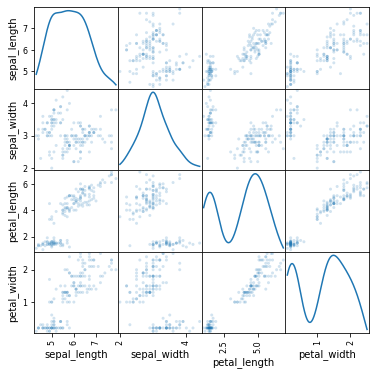

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# we use the iris dataset
import seaborn as sns
data = sns.load_dataset('iris')

# Make the plot
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

## Parallel Coordinate plot

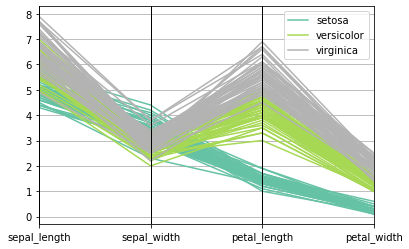

In [15]:
from pandas.plotting import parallel_coordinates

# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

## Streamgraph
To visualize a streamgraph in Python we use make use of stackplots from the *matplotlib* package. Stackplots are generated by plotting different datasets vertically on top of one another rather than overlapping with one another.

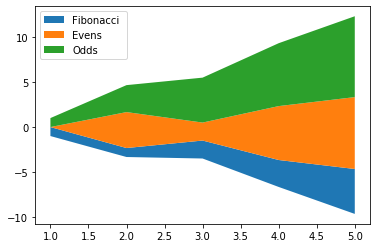

In [16]:
# the values for our x-axis
x = [1, 2, 3, 4, 5]
# the values that will be stacked on top of each other
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

# the labels for y1, y2 and y3
labels = ["Fibonacci ", "Evens", "Odds"]

#stacking our values vertically
y = numpy.vstack([y1, y2, y3])

fig, ax = plt.subplots()
#modifying the axis
ax.stackplot(x, y1, y2, y3, labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.show()

## Heatmap
We use the heatmap function from the *seaborn package* to create a heatmap. Note that we have to aggregate/pivot our data into the correct shape before the heatmap can be created.

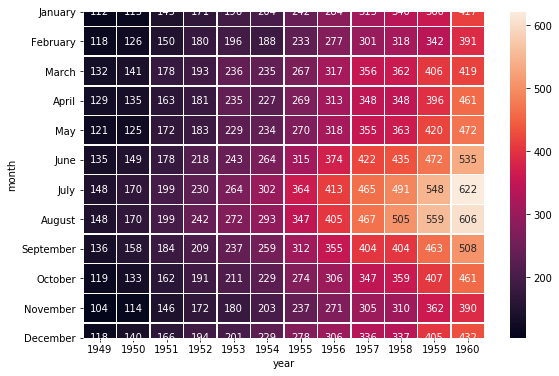

In [17]:
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# Your turn!
In real-life no one is going to tell you which visualization technique to use for which data! 
Pretend that you are a data scientist who was just provided with the datasets used in this instruction session. Visualize the data using the previously presented techniques and/or other suitable techniques provided by the matplotlib (https://matplotlib.org/gallery/index.html) and the seaborn packages (https://seaborn.pydata.org/examples/index.html). Decide by yourself which part of the data you want to visualize using which plot.

In [ ]:
# your solution